# 2.2 Video Game Sales 电子游戏销售分析
电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；
预测每年电子游戏销售额。
可视化应用：如何完整清晰地展示这个销售故事。
代码仓库：https://github.com/Graceqi/video_game
数据集：https://www.kaggle.com/gregorut/videogamesales

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import pearsonr,spearmanr,kendalltau
plt.rc("font",family="SimHei",size="15")  #解决中文乱码问题

In [2]:
video_data = pd.read_csv(r"D:\数据挖掘课件视频\数据集\vgsales\vgsales.csv")
print(video_data.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [3]:
video_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


           index  missNum  missRate
3           Year      271  0.016327
5      Publisher       58  0.003494
0           Rank        0  0.000000
1           Name        0  0.000000
2       Platform        0  0.000000
4          Genre        0  0.000000
6       NA_Sales        0  0.000000
7       EU_Sales        0  0.000000
8       JP_Sales        0  0.000000
9    Other_Sales        0  0.000000
10  Global_Sales        0  0.000000


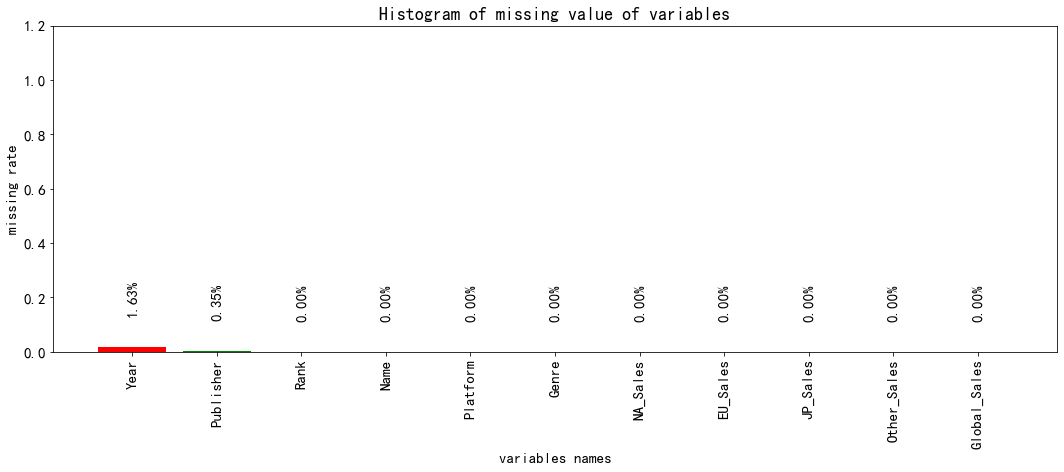

In [4]:
# 统计缺失值数量
missing=video_data.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例
missing['missRate']=missing['missNum']/video_data.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>=0].sort_values(by='missRate',ascending=False)
print(miss_analy)
# miss_analy 存储的是每个变量缺失情况的数据框
fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
plt.xticks(rotation=90)
# 添加数值显示
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])
    
plt.show()

In [5]:
#去掉缺失值所在行
print(type(video_data))
video_data=video_data.dropna()

<class 'pandas.core.frame.DataFrame'>


# 一、通过统计平台、类别、出版商的频率分布，来发现拥有最多游戏的游戏平台、游戏最多类别的、出版最多游戏的出版商

In [6]:
Platform=video_data['Platform'].value_counts()
Genre=video_data['Genre'].value_counts()
Publisher=video_data['Publisher'].value_counts()
print("Platform\n",Platform)
print("Genre\n",Genre)
print("Publisher\n",Publisher)

Platform
 DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
Genre
 Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64
Publisher
 Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Kokopeli Digital Studios           1
Sum

## 拥有最多游戏的游戏平台是DS、游戏最多类别的是Action、出版最多游戏的出版商是Electronic Arts

## 通过可视化数据的频率分布，来直观分析出有最多游戏的平台、游戏最常见的类别，以及出品游戏最多的出版商

## 对标称属性的分布进行统计分析Platform,Genre,Publisher

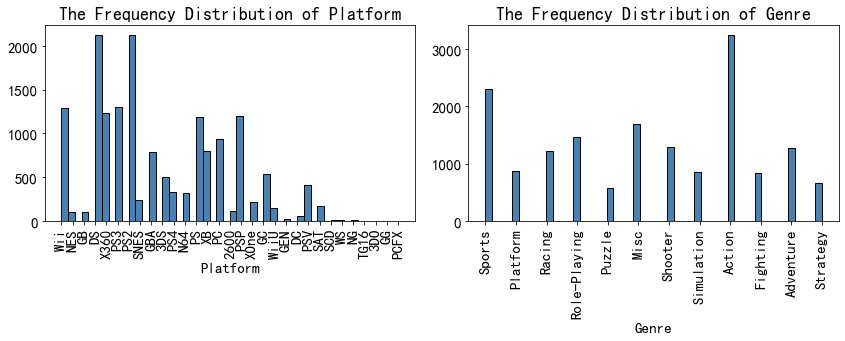

In [7]:
list_nominal=[video_data.Platform,video_data.Genre]
list_name=['Platform','Genre']
fig = plt.figure(figsize=(12,5))
for d,i in zip(list_nominal,range(3)):
    plt.subplot(1,2,i+1)
    plt.xlabel(f"{list_name[i]}")
    plt.hist(x = d, # 指定绘图数据
         bins = 50, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )
    plt.title(f"The Frequency Distribution of {list_name[i]}")
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

最常见的平台是DS和PS2,最常见的游戏类别是Action，其次就是Sports

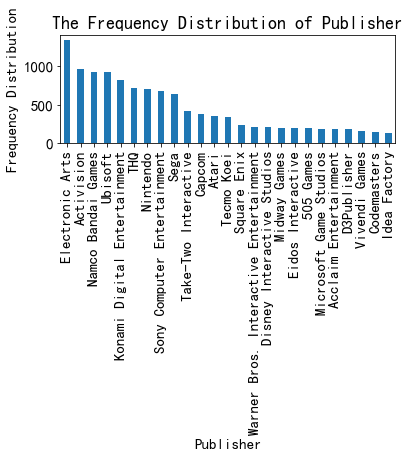

In [8]:
Publisher=video_data['Publisher'].value_counts()
Publisher[:25].plot.bar(figsize=(6,2))
# 添加x轴和y轴标签
plt.xlabel('Publisher')
plt.ylabel('Frequency Distribution')
# 添加标题
plt.title('The Frequency Distribution of Publisher')
plt.show()

出版最多游戏的出版商是Electronic Arts

# 二、统计分析游戏最高产的年份，以及游戏在不同地区的销量对比

## 对数值属性Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales进行分析

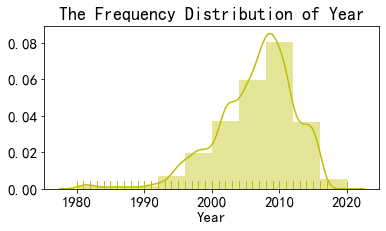

In [9]:
fig = plt.figure(figsize=(6,3))
sns.distplot(video_data.Year,bins = 10,hist = True,kde = True,rug = True,norm_hist=False,color = 'y',label = 'distplot',axlabel = 'Year')
plt.title("The Frequency Distribution of Year")
plt.show()

## 在2010年左右，游戏是发行高峰

## 画出NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales的分布图和盒图

NA_Sales:
count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64
EU_Sales:
count    16291.000000
mean         0.147731
std          0.509303
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64
JP_Sales:
count    16291.000000
mean         0.078833
std          0.311879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64
Other_Sales:
count    16291.000000
mean         0.048426
std          0.190083
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64
Global_Sales:
count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50

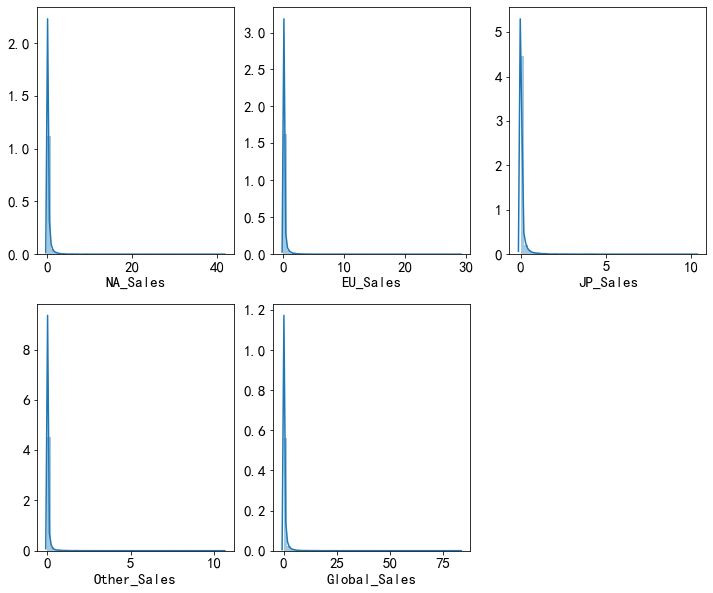

In [10]:
list_nominal=[video_data.NA_Sales,video_data.EU_Sales,video_data.JP_Sales,video_data.Other_Sales,video_data.Global_Sales]
list_name=[ 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
fig = plt.figure(figsize=(12,10))
for d,i in zip(list_nominal,range(6)):
    plt.subplot(2,3,i+1)
    plt.xlabel(f"{list_name[i]}")
    sns.distplot(d)
#     plt.tight_layout()
#     #std标准差
    print(f"{list_name[i]}:")
    print(d.describe())
#     #skewness and kurtosis偏度和峰度
#     print("Skewness: %f" % d.skew())
#     print("Kurtosis: %f" % d.kurt())
plt.show()


由上面的频率分布图和下面的盒图可以看出，NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales这五列数据的分布比较离散化。并且接近于0的数据较多

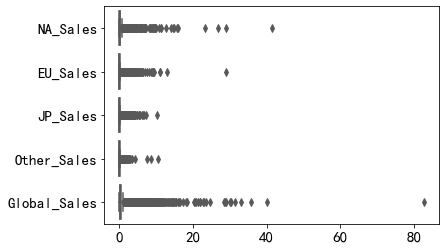

In [11]:
ax = sns.boxplot(data=video_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']], orient="h", palette="Set2")

## 计算'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'之间的相似度:

In [12]:
data=list(combinations(video_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']], 2))
print(data)

[('NA_Sales', 'EU_Sales'), ('NA_Sales', 'JP_Sales'), ('NA_Sales', 'Other_Sales'), ('NA_Sales', 'Global_Sales'), ('EU_Sales', 'JP_Sales'), ('EU_Sales', 'Other_Sales'), ('EU_Sales', 'Global_Sales'), ('JP_Sales', 'Other_Sales'), ('JP_Sales', 'Global_Sales'), ('Other_Sales', 'Global_Sales')]


In [13]:
for d in data:
    print(d)
    x=video_data[d[0]]
    y=video_data[d[1]]
    #皮尔森相似度
    print("皮尔森相似度",pearsonr(x,y)[0])
    #余弦相似度计算方法
    tmp=sum(a*b for a,b in zip(x,y))
    non=np.linalg.norm(x)*np.linalg.norm(y)
    print("余弦相似度",round(tmp/float(non),3))
    #欧几里得相似度计算方法
    print("欧几里得相似度计算",math.sqrt(sum(pow(a-b,2) for a,b in zip(x,y))))

('NA_Sales', 'EU_Sales')
皮尔森相似度 0.76892299275656
余弦相似度 0.788
欧几里得相似度计算 70.54913039860722
('NA_Sales', 'JP_Sales')
皮尔森相似度 0.45128349855796596
余弦相似度 0.492
欧几里得相似度计算 96.9549049816405
('NA_Sales', 'Other_Sales')
皮尔森相似度 0.6345183808971391
余弦相似度 0.661
欧几里得相似度计算 95.62417581343604
('NA_Sales', 'Global_Sales')
皮尔森相似度 0.9412692156419177
余弦相似度 0.947
欧几里得相似度计算 112.87206297396395
('EU_Sales', 'JP_Sales')
皮尔森相似度 0.43637912024367376
余弦相似度 0.475
欧几里得相似度计算 60.24130642674049
('EU_Sales', 'Other_Sales')
皮尔森相似度 0.7262563329088042
余弦相似度 0.745
欧几里得相似度计算 51.80765387469836
('EU_Sales', 'Global_Sales')
皮尔森相似度 0.9032637339929385
余弦相似度 0.911
欧几里得相似度计算 152.54547912015508
('JP_Sales', 'Other_Sales')
皮尔森相似度 0.2905591748859414
余弦相似度 0.333
欧几里得相似度计算 40.33554759761902
('JP_Sales', 'Global_Sales')
皮尔森相似度 0.6127741711194433
余弦相似度 0.642
欧几里得相似度计算 187.9400159625312
('Other_Sales', 'Global_Sales')
皮尔森相似度 0.7479639060045403
余弦相似度 0.766
欧几里得相似度计算 193.1250263430254


## 由上面的相似度计算可以得出，'NA_Sales', 'EU_Sales'分别对总收入'Global_Sales'的相似度较高，说明'NA_Sales', 'EU_Sales'占总收入'Global_Sales'的比重较大， 而'JP_Sales', 'Other_Sales'对总收入的相似度较低，说明所占比重较小。而且'NA_Sales', 'EU_Sales'，'Global_Sales'之间的相似度都在0.7以上，唯独'JP_Sales'与其他三项的相似度均在0.4，说明日本的销量'JP_Sales'与其他国家销量的关系不大。

# 三、通过对不同游戏的名称、平台、类别、出版商分别来计算全球销量，来统计出最受欢迎的游戏、类型、发布平台、发行人

In [14]:
Name_data=video_data.groupby(by=['Name'])['Global_Sales'].sum()
Name_data.sort_values(ascending = False, inplace = True)
Name_data

Name
Wii Sports                                       82.74
Grand Theft Auto V                               55.92
Super Mario Bros.                                45.31
Tetris                                           35.84
Mario Kart Wii                                   35.82
                                                 ...  
Fate/kaleid liner Prisma Illya                    0.01
Uta no * Prince-Sama: Sweet Serenade              0.01
Deus Ex                                           0.01
Sangoku Koi Senki: Omoide Gaeshi - CS Edition     0.01
Mahou Sensei Negima!? Neo-Pactio Fight!!          0.01
Name: Global_Sales, Length: 11325, dtype: float64

## 通过对游戏名称统计并排序总销量，得出Wii Sports的游戏销量最高，达到82.74 million的全球销量，最受欢迎。

In [15]:
# Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
#        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
#       dtype='object')

Genre_data=video_data.groupby(by=['Genre'])['Global_Sales'].sum()
Genre_data.sort_values(ascending = False, inplace = True)
Genre_data

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

## 通过对游戏类别统计并排序总销量，得出Action类别的游戏销量最高，全球总销量高达1722.84 million最受欢迎。

In [16]:
Platform=video_data.groupby(by=['Platform'])['Global_Sales'].sum()
Platform.sort_values(ascending = False, inplace = True)
Platform

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

## 通过对游戏平台统计并排序总销量，得出PS2平台的游戏销量最高，全球总销量高达1233.46 million最受欢迎。

In [17]:
Publisher=video_data.groupby(by=['Publisher'])['Global_Sales'].sum()
Publisher.sort_values(ascending = False, inplace = True)
Publisher

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
                                ...   
Michaelsoft                       0.01
Media Entertainment               0.01
Takuyo                            0.01
EON Digital Entertainment         0.01
Genterprise                       0.01
Name: Global_Sales, Length: 576, dtype: float64

## 通过对游戏出版商统计并排序总销量，得出Nintendo出版商出版的游戏总销量最高，全球总销量高达1784.43 million最受欢迎。

## 经过统计得出结论：销量最高也就是最受欢迎的游戏是Wii Sports 、类型是Action、发布平台是PS2、发行人是Nintendo

# 四、 由于大多数游戏只有某一年的销售量，没有足够的数据来对每一个做销量预测。因此，可以按年份统计所有销售数据，来对总销售额做预测。

In [18]:
Year=video_data.groupby(by=['Year'])['Global_Sales'].sum()
# Year.sort_values(ascending = False, inplace = True)
Year.sort_index()
dict_Year= {'Year':Year.index,'Sum':Year.values}
df_Year = pd.DataFrame(dict_Year)
print(df_Year)

      Year     Sum
0   1980.0   11.38
1   1981.0   35.77
2   1982.0   28.86
3   1983.0   16.79
4   1984.0   50.36
5   1985.0   53.94
6   1986.0   37.07
7   1987.0   21.74
8   1988.0   47.22
9   1989.0   73.45
10  1990.0   49.39
11  1991.0   32.23
12  1992.0   76.16
13  1993.0   45.98
14  1994.0   79.17
15  1995.0   88.11
16  1996.0  199.15
17  1997.0  200.98
18  1998.0  256.47
19  1999.0  251.27
20  2000.0  201.56
21  2001.0  331.47
22  2002.0  395.52
23  2003.0  357.85
24  2004.0  414.01
25  2005.0  458.51
26  2006.0  521.04
27  2007.0  609.92
28  2008.0  678.90
29  2009.0  667.30
30  2010.0  600.29
31  2011.0  515.80
32  2012.0  363.49
33  2013.0  368.11
34  2014.0  337.03
35  2015.0  264.44
36  2016.0   70.90
37  2017.0    0.05
38  2020.0    0.29


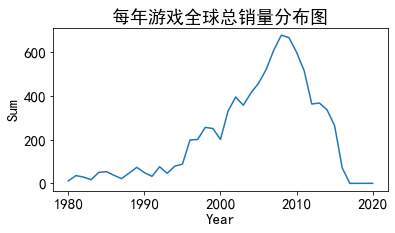

In [19]:
fig = plt.figure(figsize=(6,3))
# sns.distplot(df_Year.Year,bins = 10,hist = True,kde = True,rug = True,norm_hist=False,color = 'y',label = 'distplot',axlabel = 'Year')
sns.lineplot(x=df_Year.Year, y=df_Year.Sum,err_style="bars", ci=68, data=df_Year)
plt.title("每年游戏全球总销量分布图")
plt.show()

## 由上图可看出，每年游戏总销量的分布图与之前每年游戏数量的分布图很相似

In [20]:
video_data.Global_Sales.describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

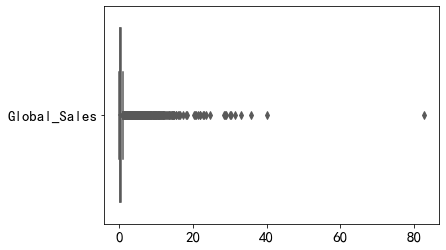

In [21]:
 sns.boxplot(data=video_data[['Global_Sales']], orient="h", palette="Set2")

D:\annaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\annaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


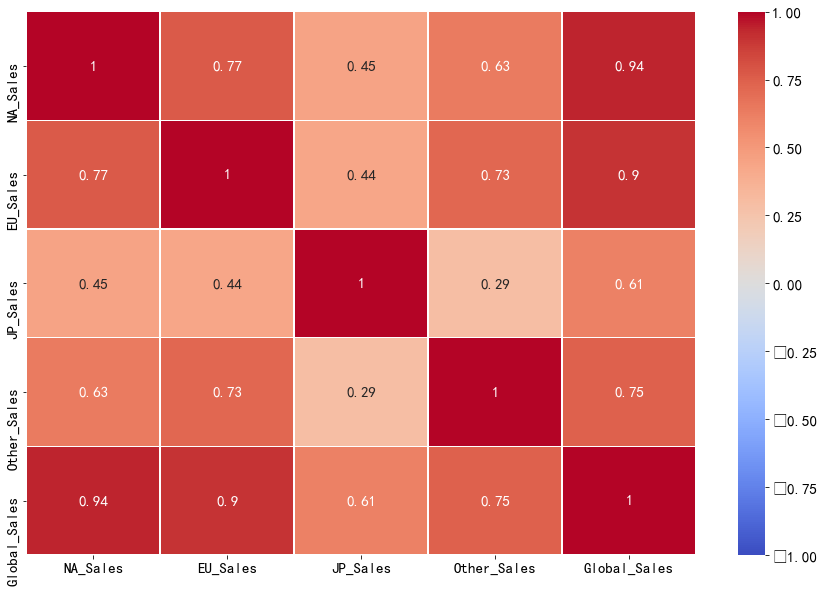

In [22]:
num=video_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
corr = num.corr()

fig = plt.figure(figsize=(15,10))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

In [23]:
from sklearn.model_selection import train_test_split as tts
X=video_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y=video_data[[ 'Global_Sales']]
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

In [24]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [25]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print(selected_feat)

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')


In [26]:
X_train = X_train[selected_feat].reset_index(drop=True)

In [27]:
X_train.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.31,0.19,0.02,0.06
1,0.39,0.00,0.00,0.03
2,0.54,1.16,0.13,0.32
3,0.10,0.01,0.00,0.01
4,0.14,0.06,0.00,0.04


In [28]:
X_test=X_test[selected_feat]

In [29]:
X_test.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7993,0.10,0.07,0.00,0.01
7899,0.00,0.00,0.19,0.00
14987,0.02,0.01,0.00,0.00
10496,0.09,0.00,0.00,0.01
14556,0.00,0.00,0.03,0.00


# 线性回归做销量预测

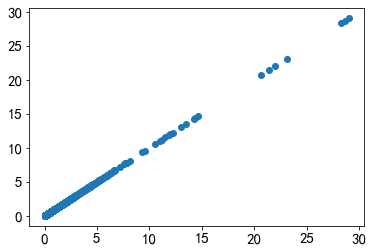

MAE: 0.0029741815283156406
MSE: 2.8065259439523284e-05
RMSE: 0.005297665470707195

Accuracy : 0.9999856748617503


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()

#Fitting linear model on train dataset
lm.fit(X_train,y_train)

#Test dataset prediction
lm_predictions = lm.predict(X_test)

#Scatterplot
plt.scatter(y_test, lm_predictions)
plt.show()

#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))

#Accuracy
print("\nAccuracy : {}".format(lm.score(X_test,y_test)))

## 准确率高达0.9999856748617503